# package  import 

In [1]:
import numpy as np # linear algebra
import pandas  as pd # data analysis
import matplotlib.pyplot as plt # data visulization
import seaborn  as sns # advance data visulization
from sklearn.model_selection import  train_test_split # create train  and  test dataset
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report # for  evalution
from sklearn.svm import  SVC
from sklearn.utils import shuffle

# collecting  data

In [2]:
matches =pd.read_csv("WorldCupMatches.csv")
cups=pd.read_csv("WorldCups.csv")

# cleaning data

In [3]:
matches = matches.dropna()
cups=cups.dropna()

In [4]:
matches.tail()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
847,2014.0,05 Jul 2014 - 17:00,Quarter-finals,Arena Fonte Nova,Salvador,Netherlands,0.0,0.0,Costa Rica,Netherlands win on penalties (4 - 3),51179.0,0.0,0.0,Ravshan IRMATOV (UZB),RASULOV Abduxamidullo (UZB),KOCHKAROV Bakhadyr (KGZ),255953.0,300186488.0,NED,CRC
848,2014.0,08 Jul 2014 - 17:00,Semi-finals,Estadio Mineirao,Belo Horizonte,Brazil,1.0,7.0,Germany,,58141.0,0.0,5.0,RODRIGUEZ Marco (MEX),TORRENTERA Marvin (MEX),QUINTERO Marcos (MEX),255955.0,300186474.0,BRA,GER
849,2014.0,09 Jul 2014 - 17:00,Semi-finals,Arena de Sao Paulo,Sao Paulo,Netherlands,0.0,0.0,Argentina,Argentina win on penalties (2 - 4),63267.0,0.0,0.0,C�neyt �AKIR (TUR),DURAN Bahattin (TUR),ONGUN Tarik (TUR),255955.0,300186490.0,NED,ARG
850,2014.0,12 Jul 2014 - 17:00,Play-off for third place,Estadio Nacional,Brasilia,Brazil,0.0,3.0,Netherlands,,68034.0,0.0,2.0,HAIMOUDI Djamel (ALG),ACHIK Redouane (MAR),ETCHIALI Abdelhak (ALG),255957.0,300186502.0,BRA,NED
851,2014.0,13 Jul 2014 - 16:00,Final,Estadio do Maracana,Rio De Janeiro,Germany,1.0,0.0,Argentina,Germany win after extra time,74738.0,0.0,0.0,Nicola RIZZOLI (ITA),Renato FAVERANI (ITA),Andrea STEFANI (ITA),255959.0,300186501.0,GER,ARG


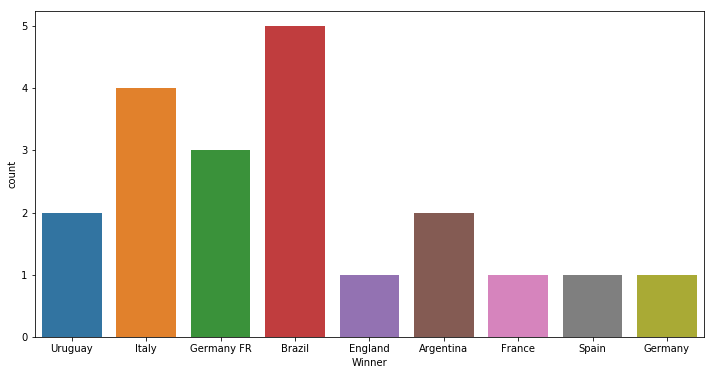

In [5]:
# no. of WC championship
plt.figure(figsize=(12,6))
sns.countplot(cups["Winner"])

In [6]:
# Replace German DR and  Germany FR by Germany 
# Replace Sovient  Union by Russia 
def replace_name(df):
    if(df["Home Team Name"] in ["German DR","Germany FR"]):
        df["Home Team Name"] ="Germany"
    elif(df["Home Team Name"] in ["Soviet Union"]):
        df["Home Team Name"] ="Russia"
    elif(df["Away Team Name"] in ["German DR","Germany FR"]):
        df["Away Team Name"] ="Germany"
    elif(df["Away Team Name"] in ["Soviet Union"]):
        df["Away Team Name"] ="Russia" 
    return df

matches =matches.apply(replace_name,axis="columns")

In [7]:
# Create a Dictionary of football team
team_name= {}
index = 0
for ind,row in matches.iterrows():
    name =row["Home Team Name"]
    if(name not in team_name.keys()):
        team_name[name]=index
        index+=1
    name = row['Away Team Name']
    if(name not  in team_name.keys()):
        team_name[name]=index
        index +=1
team_name

{'France': 0,
 'Mexico': 1,
 'USA': 2,
 'Belgium': 3,
 'Yugoslavia': 4,
 'Brazil': 5,
 'Romania': 6,
 'Peru': 7,
 'Argentina': 8,
 'Chile': 9,
 'Bolivia': 10,
 'Paraguay': 11,
 'Uruguay': 12,
 'Austria': 13,
 'Hungary': 14,
 'Egypt': 15,
 'Switzerland': 16,
 'Netherlands': 17,
 'Sweden': 18,
 'Germany': 19,
 'Spain': 20,
 'Italy': 21,
 'Czechoslovakia': 22,
 'Dutch East Indies': 23,
 'Cuba': 24,
 'Norway': 25,
 'Poland': 26,
 'England': 27,
 'Scotland': 28,
 'Turkey': 29,
 'Korea Republic': 30,
 'Russia': 31,
 'Wales': 32,
 'Northern Ireland': 33,
 'Colombia': 34,
 'Bulgaria': 35,
 'Korea DPR': 36,
 'Portugal': 37,
 'Soviet Union': 38,
 'Israel': 39,
 'Morocco': 40,
 'El Salvador': 41,
 'Australia': 42,
 'Zaire': 43,
 'Haiti': 44,
 'Germany FR': 45,
 'Tunisia': 46,
 'IR Iran': 47,
 'Iran': 48,
 'Cameroon': 49,
 'New Zealand': 50,
 'Algeria': 51,
 'Honduras': 52,
 'Kuwait': 53,
 'Canada': 54,
 'Iraq': 55,
 'Denmark': 56,
 'rn">United Arab Emirates': 57,
 'Costa Rica': 58,
 'rn">Republic

In [8]:
# Drop unnecessary Columns 
dropped_matches =matches.drop(['Datetime', 'Stage', 'Stadium', 'City',
       'Win conditions', 'Attendance', 'Half-time Home Goals',
       'Half-time Away Goals', 'Referee', 'Assistant 1', 'Assistant 2',
       'RoundID', 'MatchID', 'Home Team Initials', 'Away Team Initials'],axis=1)

In [9]:
# Make a series counting number of  times each team 
# become WC champion

championships =cups["Winner"].map (lambda t: 'Germany' if t == 'Germany FR' else t ).value_counts()
championships

Brazil       5
Germany      4
Italy        4
Argentina    2
Uruguay      2
England      1
France       1
Spain        1
Name: Winner, dtype: int64

In [10]:
# append 'Home  Team Champions' and 'Away Team Champions'

dropped_matches['Home Team Champions'] =0
dropped_matches['Away Team Champions'] =0

In [11]:
# fill  values
def count_championship(df):
    if(championships.get(df['Home Team Name'])!=None):
        df['Home Team Champions']= championships.get(df['Home Team Name'])
        
    if(championships.get(df['Away Team Name'])!=None):
        df['Away Team Champions']= championships.get(df['Away Team Name'])
        
    return df
matches =dropped_matches.apply(count_championship,axis=1)

In [12]:
matches

,Year,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Home Team Champions,Away Team Champions
0,1930.0,France,4.0,1.0,Mexico,1,0
1,1930.0,USA,3.0,0.0,Belgium,0,0
2,1930.0,Yugoslavia,2.0,1.0,Brazil,0,5
3,1930.0,Romania,3.0,1.0,Peru,0,0
4,1930.0,Argentina,1.0,0.0,France,2,1
5,1930.0,Chile,3.0,0.0,Mexico,0,0
6,1930.0,Yugoslavia,4.0,0.0,Bolivia,0,0
7,1930.0,USA,3.0,0.0,Paraguay,0,0
8,1930.0,Uruguay,1.0,0.0,Peru,2,0
9,1930.0,Chile,1.0,0.0,France,0,1


In [13]:
# Find  who  won: Home win :1,Away win :2 Draw :0
matches['Winner'] = "-"

In [14]:
def find_winner(df):
    home_team_goal =int(df['Home Team Goals'])
    away_team_goal =int(df['Away Team Goals'])
    if home_team_goal== away_team_goal:
        df['Winner']=0
    elif home_team_goal > away_team_goal:
        df['Winner']=1
    else:
        df['Winner'] =2
    return df

In [15]:
matches=matches.apply(find_winner,axis=1)

In [16]:
matches

,Year,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Home Team Champions,Away Team Champions,Winner
0,1930.0,France,4.0,1.0,Mexico,1,0,1
1,1930.0,USA,3.0,0.0,Belgium,0,0,1
2,1930.0,Yugoslavia,2.0,1.0,Brazil,0,5,1
3,1930.0,Romania,3.0,1.0,Peru,0,0,1
4,1930.0,Argentina,1.0,0.0,France,2,1,1
5,1930.0,Chile,3.0,0.0,Mexico,0,0,1
6,1930.0,Yugoslavia,4.0,0.0,Bolivia,0,0,1
7,1930.0,USA,3.0,0.0,Paraguay,0,0,1
8,1930.0,Uruguay,1.0,0.0,Peru,2,0,1
9,1930.0,Chile,1.0,0.0,France,0,1,1


In [17]:
matches['Winner'].value_counts()

1    486
0    190
2    174
Name: Winner, dtype: int64

In [18]:
# replace  Team  Name by Id
def replace_team_name(df):
    df["Home Team Name"]=team_name[df["Home Team Name"]]
    df["Away Team Name"]=team_name[df["Away Team Name"]]
    return df

In [19]:
matches =matches.apply(replace_team_name,axis=1)

In [20]:
matches

,Year,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Home Team Champions,Away Team Champions,Winner
0,1930.0,0,4.0,1.0,1,1,0,1
1,1930.0,2,3.0,0.0,3,0,0,1
2,1930.0,4,2.0,1.0,5,0,5,1
3,1930.0,6,3.0,1.0,7,0,0,1
4,1930.0,8,1.0,0.0,0,2,1,1
5,1930.0,9,3.0,0.0,1,0,0,1
6,1930.0,4,4.0,0.0,10,0,0,1
7,1930.0,2,3.0,0.0,11,0,0,1
8,1930.0,12,1.0,0.0,7,2,0,1
9,1930.0,9,1.0,0.0,0,0,1,1


In [21]:
# drop unnecssary columns 
matches =matches.drop(["Year","Home Team Goals","Away Team Goals"],axis=1)

In [22]:
matches

,Home Team Name,Away Team Name,Home Team Champions,Away Team Champions,Winner
0,0,1,1,0,1
1,2,3,0,0,1
2,4,5,0,5,1
3,6,7,0,0,1
4,8,0,2,1,1
5,9,1,0,0,1
6,4,10,0,0,1
7,2,11,0,0,1
8,12,7,2,0,1
9,9,0,0,1,1


In [23]:
# append  Data :-

# simply exchange "home  team  name" with  " away team name" and 
#'home  team championship'  with "away team  championship

In [24]:
X=matches.loc[:, ["Home Team Name",
                   "Away Team Name",
                   "Home Team Champions",
                   "Away Team Champions"]]
X=np.array(X)

_X= X.copy()

_X[:,0] =X[:,1]
_X[:,1] =X[:,0]
_X[:,2] =X[:,3]
_X[:,3] =X[:,2]

Y =matches.loc[:,['Winner']]
Y =np.array(Y)
Y =np.reshape(Y,(1,850))
Y=Y[0]
_Y= Y.copy()

for i in range(len(_Y)):
    if _Y[i] ==1:
        _Y[i]=2
    elif _Y[i]==2:
        _Y[i] =1

X=np.concatenate((X,_X),axis =0)
Y=np.concatenate((Y,_Y))

In [25]:
len(X)

1700

In [26]:
X,Y=shuffle(X,Y)

In [27]:
# Split Test And  Train
x_train,x_test,y_train,y_test =train_test_split(X,
                                               Y,
                                               test_size=0.3)

In [28]:
x_train

array([[52, 69,  0,  0],
       [18, 11,  0,  0],
       [ 9,  1,  0,  0],
       ..., 
       [31, 27,  0,  1],
       [31,  0,  0,  1],
       [20, 16,  1,  0]], dtype=int64)

In [29]:
# train by  SVM
svm_model=SVC(probability=True)

In [30]:
svm_model.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [31]:
winner_pred =svm_model.predict(x_test)

In [32]:
#confusion matrix
confusion_matrix(y_test,winner_pred)

array([[ 14,  55,  49],
       [ 21, 119,  57],
       [ 21,  74, 100]], dtype=int64)

In [33]:
print(accuracy_score(y_test,winner_pred))

0.456862745098


In [34]:
print(classification_report(y_test,winner_pred))

             precision    recall  f1-score   support

          0       0.25      0.12      0.16       118
          1       0.48      0.60      0.53       197
          2       0.49      0.51      0.50       195

avg / total       0.43      0.46      0.43       510



In [43]:
def prediction(team1, team2):
    id1 = team_name[team1]
    id2 = team_name[team2]
    
    championship1=championships.get(team1) if championships.get(team1) != None else 0
    championship2=championships.get(team2) if championships.get(team2) != None else 0
    
    x =np.array([id1,id2,championship1,championship2])
    
    x=x.reshape((1,-1))
    win_prob =svm_model.predict_proba(x)[0]
    
    text = '''Chance of {} to win {} is {} % \n
            Chance of {} to win {} is {} % \n
            Chance for {} to {} draw is {} %'''.format(team1,team2,win_prob[1]*100,team1,team2,win_prob[2]*100,team1,team2,win_prob[0]*100)
    
    return win_prob,text

In [44]:

pro, text =prediction("France","Brazil")
print(text)

Chance of France to win Brazil is 41.26755650507813 % 

            Chance of France to win Brazil is 38.1629430124655 % 

            Chance for France to Brazil draw is 20.569500482456384 %
